# Imports

In [1]:
"""Module pour analyser la distribution des données."""
import pandas as pd
from constants import LABEL_COLUMN, TEXT_COLUMN, TRAINING_DATA_PATH, EMBEDDING_SIZE, ALPHABET_COLUMN, ALPHABETS
import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv(TRAINING_DATA_PATH)


## Info générales sur le dataset

In [14]:
print(df.info())
print("Nombre de classes différentes : ", df[LABEL_COLUMN].nunique())
print("Exemples présents dans le dataset \n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38854 entries, 0 to 38853
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      38854 non-null  int64 
 1   Usage   38854 non-null  object
 2   Text    38854 non-null  object
 3   Label   38754 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None
Nombre de classes différentes :  389
Exemples présents dans le dataset 
     ID   Usage                                               Text Label
0  136  Public  Finalment  Atena le recibe en l'acropoli d'Ate...   arg
1   62  Public  Jane Laffort fille de Joseph Laffort et d' Ang...   lat
2   74  Public  Сонзэ ялаксонзо  - Роджер Джозеф Бошкович  - у...   myv
3   40  Public  Mɛniɛ nkùɔ dìì mɔ̀nnì bɛnìtìbɛ̀ kɛ́deè  kɛ̀ Nɔ...   tbz
4   30  Public  Ka go dirisa thekniki yeo ya phetogonepiso  Le...   tsn


In [15]:
print("Nombre d'ID différents : ", df["ID"].nunique())
print("Nombre de Usage différents : ", df["Usage"].nunique())
print("Nombre de Text différents : ", df["Text"].nunique())

Nombre d'ID différents :  80
Nombre de Usage différents :  1
Nombre de Text différents :  38852


## Droping null values

In [2]:
df.dropna(inplace=True)

## Les 10 classes les plus présentes et leur distribution

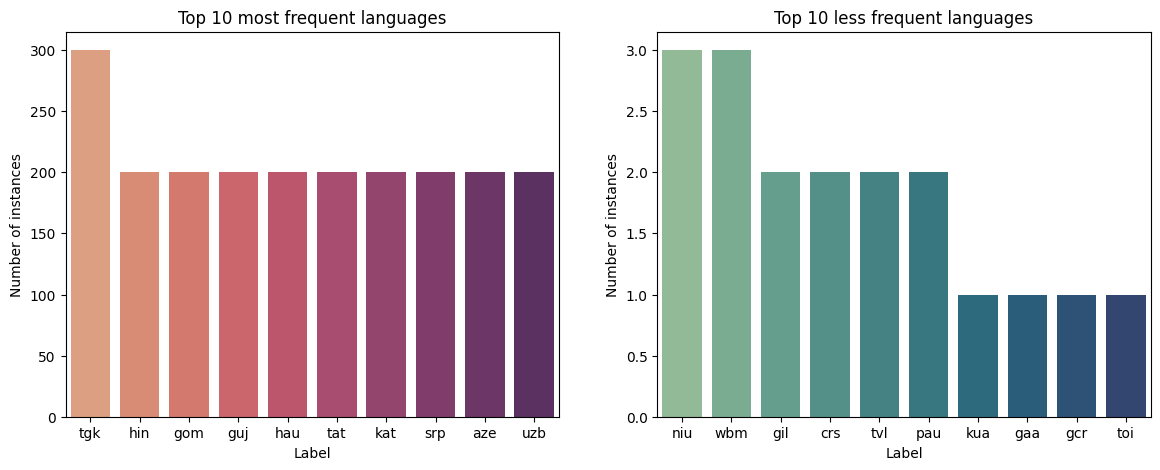

In [7]:
# Compter le nombre d'instances par classe
classe_counts = df[LABEL_COLUMN].value_counts()

# Sélection des 10 classes les plus fréquentes
top_10_classes = classe_counts.head(10)

# Sélection des 10 classes les moins fréquentes
bottom_10_classes = classe_counts.tail(10)

# Créer la figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Afficher les 10 classes les plus fréquentes
sns.barplot(x=top_10_classes.index, y=top_10_classes.values, ax=axes[0], hue=top_10_classes.index, palette="flare")
axes[0].set_title("Top 10 most frequent languages")
axes[0].set_ylabel("Number of instances")

# Afficher les 10 classes les moins fréquentes
sns.barplot(x=bottom_10_classes.index, y=bottom_10_classes.values, ax=axes[1], hue=bottom_10_classes.index, palette="crest")
axes[1].set_title("Top 10 less frequent languages")
axes[1].set_ylabel("Number of instances")

# Afficher le graphique
plt.show()

## Répartition des langues par nombre d'instances

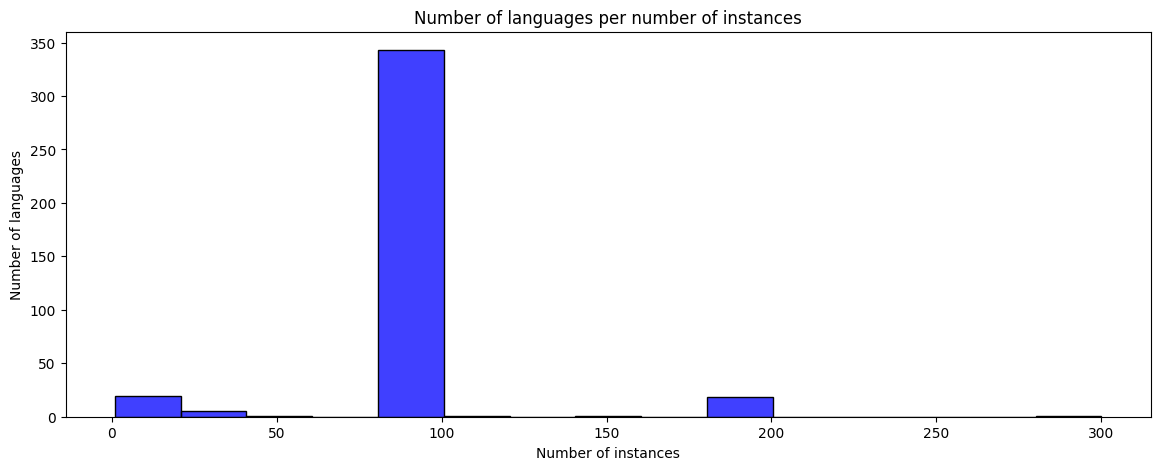

In [28]:
# Graphe du nombre de langue par tranche de 50 instances (histogramme)
plt.figure(figsize=(14, 5))
sns.histplot(classe_counts, stat="count", binwidth=20, color="blue")
plt.title("Number of languages per number of instances")
plt.xlabel("Number of instances")
plt.ylabel("Number of languages")
plt.show()

# Représentation des données

## Script de détection de l'alphabet

In [3]:
def detect_alphabet(text):
    detected = ""
    
    for char in text:
        char_code = ord(char)
        
        for alphabet, (start, end) in ALPHABETS.items():
            if start <= char_code <= end:
                detected = alphabet
    
    return detected if detected else "Inconnu"

# ======= TESTS =======
texts = [
    "Hello, how are you?",  # Latin
    "Привет, как дела?",  # Cyrillique
    "مرحبا كيف حالك؟",  # Arabe
    "שלום מה שלומך?",  # Hébreu
    "你好，你怎么样？",  # Chinois
    "こんにちは、元気ですか？",  # Japonais (Hiragana & Kanji)
    "안녕하세요, 어떻게 지내세요?",  # Coréen
    "Γεια σας, πώς είστε;",  # Grec
    "नमस्ते, आप कैसे हैं?",  # Devanagari (Hindi)
    "สวัสดีคุณเป็นอย่างไรบ้าง",  # Thaï
]

for text in texts:
    print(f"Texte: {text}")
    print(f"Alphabet détecté: {detect_alphabet(text)}")
    print("-" * 50)


Texte: Hello, how are you?
Alphabet détecté: Latin
--------------------------------------------------
Texte: Привет, как дела?
Alphabet détecté: Cyrillic
--------------------------------------------------
Texte: مرحبا كيف حالك؟
Alphabet détecté: Arabic
--------------------------------------------------
Texte: שלום מה שלומך?
Alphabet détecté: Hebrew
--------------------------------------------------
Texte: 你好，你怎么样？
Alphabet détecté: Chinese
--------------------------------------------------
Texte: こんにちは、元気ですか？
Alphabet détecté: Hiragana
--------------------------------------------------
Texte: 안녕하세요, 어떻게 지내세요?
Alphabet détecté: Korean
--------------------------------------------------
Texte: Γεια σας, πώς είστε;
Alphabet détecté: Greek
--------------------------------------------------
Texte: नमस्ते, आप कैसे हैं?
Alphabet détecté: Devanagari
--------------------------------------------------
Texte: สวัสดีคุณเป็นอย่างไรบ้าง
Alphabet détecté: Thai
-----------------------------------------

## Identification de la langue via l'alphabet

In [8]:
df = pd.read_csv("data/train_data_with_embedding_per_column.csv")
df[ALPHABET_COLUMN] = df[TEXT_COLUMN].apply(detect_alphabet)
df.dropna(inplace=True)

## Visualisation par PCA de chaque alphabet

<Axes: xlabel='PCA1', ylabel='PCA2'>

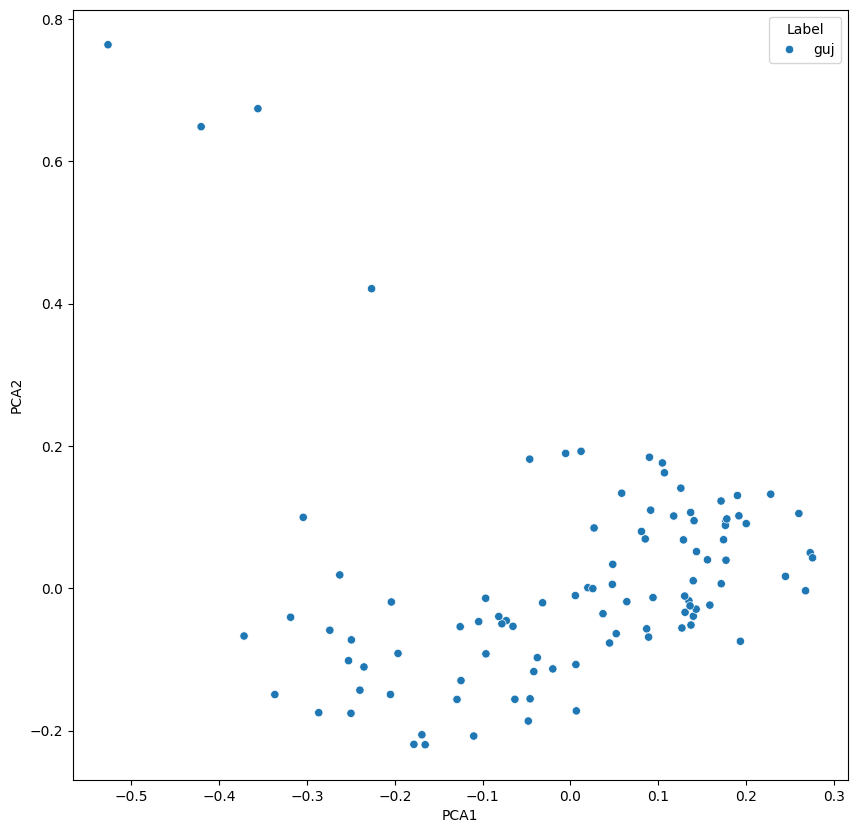

In [5]:
# Méthode PCA pour analyser les distributions des embeddings en fonction des labels
from sklearn.decomposition import PCA

chosen_alphabet = "Gujarati"

pca = PCA(n_components=2)

#Fit PCA on the training DataFrame and transform the data
train_vector_embedded = pca.fit_transform(df[[f"embedding_{i}" for i in range(EMBEDDING_SIZE)]])

#Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=train_vector_embedded, columns=["PCA1", "PCA2"])
pca_df[LABEL_COLUMN] = df[LABEL_COLUMN]
pca_df[ALPHABET_COLUMN] = df[ALPHABET_COLUMN]
pca_df = pca_df[pca_df[ALPHABET_COLUMN] == chosen_alphabet]

#Create a scatter plot of the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue=LABEL_COLUMN, palette="tab10")

## Visualisation par TSNE de chaque alphabet

<Axes: xlabel='T-SNE1', ylabel='T-SNE2'>

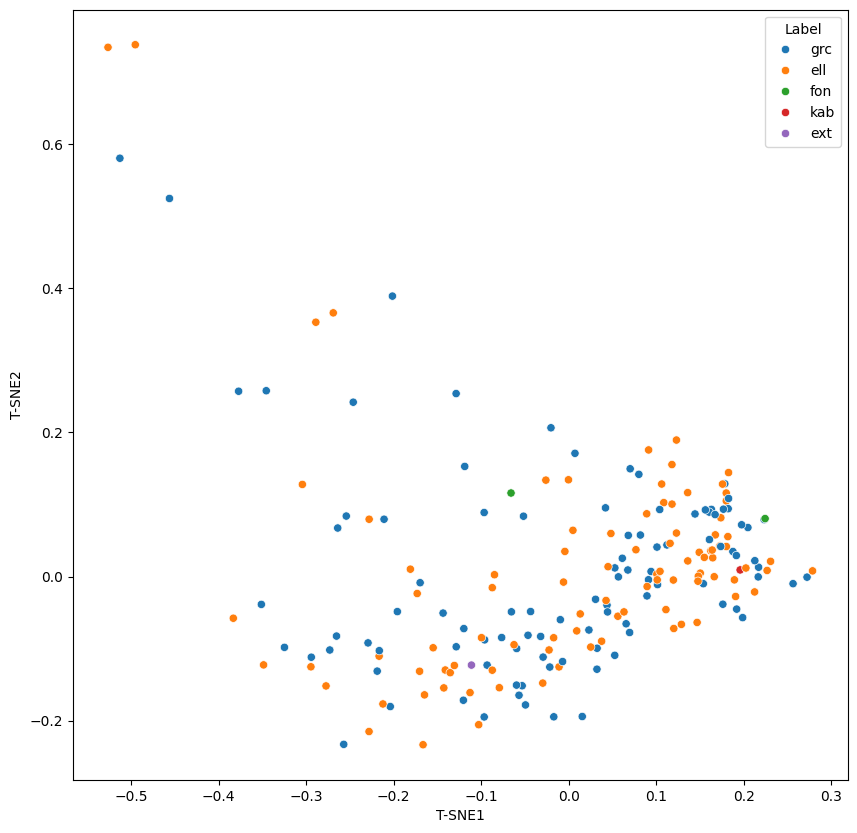

In [10]:
from sklearn.manifold import TSNE


chosen_alphabet = "Greek"

# Appliquer t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

X_embedded = tsne.fit_transform(df[[f"embedding_{i}" for i in range(EMBEDDING_SIZE)]])

#Create a new DataFrame with the PCA results
tsne_df = pd.DataFrame(data=train_vector_embedded, columns=["T-SNE1", "T-SNE2"])
tsne_df[LABEL_COLUMN] = df[LABEL_COLUMN]
tsne_df[ALPHABET_COLUMN] = df[ALPHABET_COLUMN]
tsne_df = tsne_df[tsne_df[ALPHABET_COLUMN] == chosen_alphabet]

#Create a scatter plot of the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(data=tsne_df, x="T-SNE1", y="T-SNE2", hue=LABEL_COLUMN, palette="tab10")

Conclusion : the data cannot be grouped easily into clusters, two dimensions may not be sufficient to seperate data. 
However, we observe that some alphabets contain few languages

In [ ]:
for alphabet in ALPHABETS:
    # Print the unique labels per alphabet
    labels_per_alphabet = df[df["Alphabet"] == alphabet][LABEL_COLUMN]
    if len(labels_per_alphabet.unique()) < 6:
        print(f"Alphabet: {alphabet}")
        print(labels_per_alphabet.unique())
        print("-" * 50)

Alphabet: Hébreu
['yid' 'heb' 'hbo']
--------------------------------------------------
Alphabet: Hiragana
['jpn']
--------------------------------------------------
Alphabet: Katana
['jpn' 'cbk']
--------------------------------------------------
Alphabet: Coréen
['kor' 'rmy']
--------------------------------------------------
Alphabet: Grec
['grc' 'ell' 'fon' 'kab' 'ext']
--------------------------------------------------
Alphabet: Gujarati
['guj']
--------------------------------------------------
Alphabet: Thaï
['tha']
--------------------------------------------------
Alphabet: Géorgien
['xmf' 'kat']
--------------------------------------------------


On peut faire les assimilations 
 - Thai -> "tha"
 - Hiragana -> jpn
 - Gujarati -> 'guj'
Some labels only have one occurence inside an alphabet, we can then add the following associations:
- "Korean" -> "kor"
- "Katana" -> "jpn"  


# Modèles de détection de langue dans des alphabets contenant au plus 5 langues

In [12]:
SMALL_ALPHABETS = ["Hebrew", "Greek", "Georgian"]

In [13]:
# Delete rows with missing values
df.dropna(subset=[LABEL_COLUMN], inplace=True)

# Keep only labels with multiple occurrences
df = df[df[LABEL_COLUMN].isin(df[LABEL_COLUMN].value_counts()[df[LABEL_COLUMN].value_counts() > 1].index)]


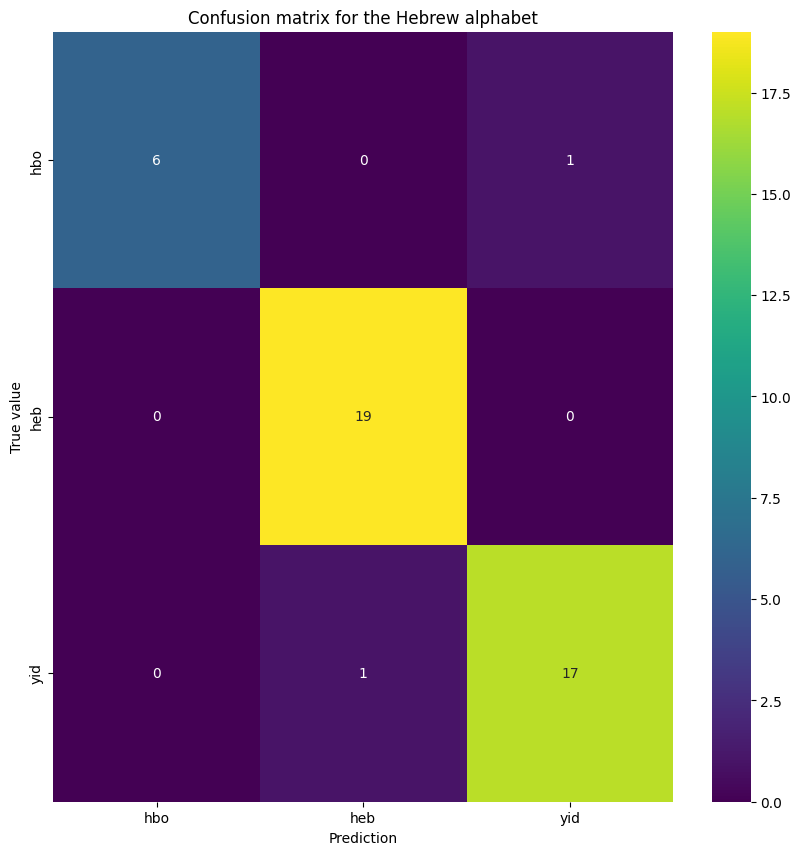

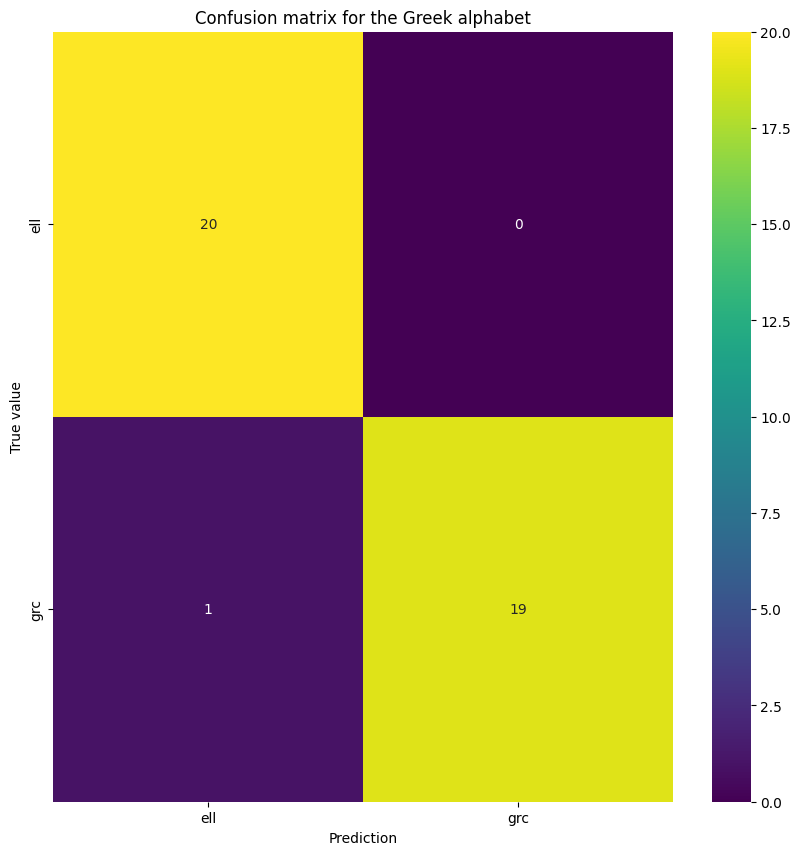

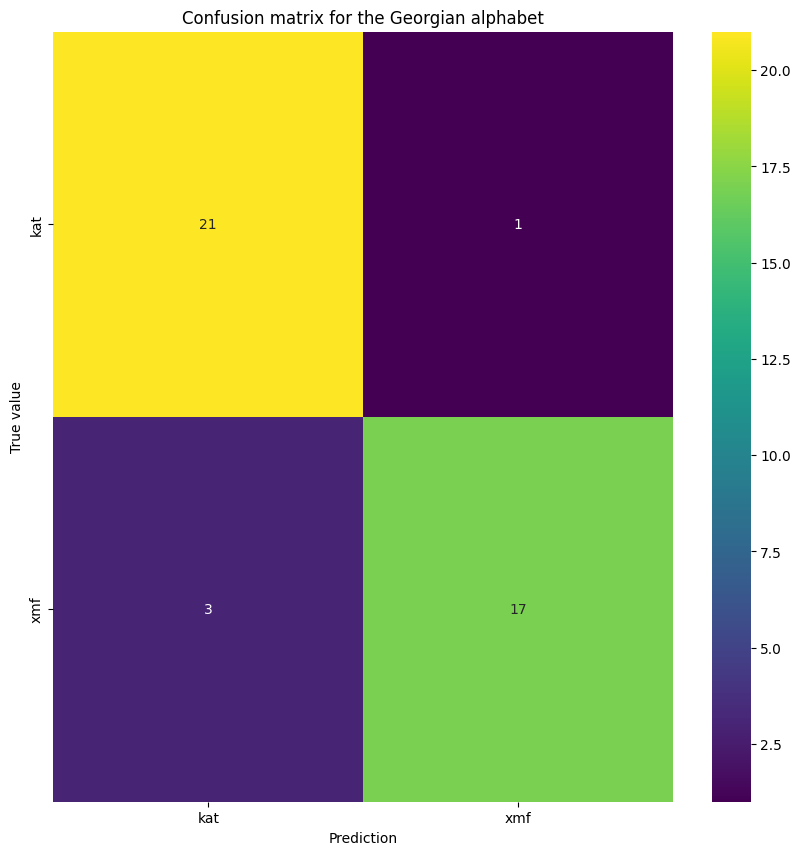

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Separating the data into training and testing data
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df[LABEL_COLUMN], random_state=42)

for small_alphabet in SMALL_ALPHABETS:

    df_train_small = df_train[df_train[ALPHABET_COLUMN] == small_alphabet]
    df_test_small = df_test[df_test[ALPHABET_COLUMN] == small_alphabet]

    # Eliminate labels present in one set and not in the other
    # This step is necessary because some labels may be underrepresented within an alphabet
    train_labels = df_train_small[LABEL_COLUMN].unique()
    test_labels = df_test_small[LABEL_COLUMN].unique()
    common_labels = set(train_labels).intersection(test_labels)

    df_train_small = df_train_small[df_train_small[LABEL_COLUMN].isin(common_labels)]
    df_test_small = df_test_small[df_test_small[LABEL_COLUMN].isin(common_labels)]
    classifier = RandomForestClassifier()
    classifier.fit(df_train_small[[f"embedding_{i}" for i in range(EMBEDDING_SIZE)]], df_train_small[LABEL_COLUMN])

    y_pred = classifier.predict(df_test_small[[f"embedding_{i}" for i in range(EMBEDDING_SIZE)]])
    cm = confusion_matrix(df_test_small[LABEL_COLUMN], y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.xlabel("Prediction")
    plt.ylabel("True value")
    plt.title(f"Confusion matrix for the {small_alphabet} alphabet")
    plt.show()

